In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import certifi
import os

In [66]:
archivo_poblacion_paises = pd.read_csv(r'C:\DATA_SCIENCE\EDA_Entrega\Base de Datos para EDA 1\covid19_country_population.csv')

df_poblacion_total = archivo_poblacion_paises.copy()

df_poblacion_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CountryAlpha3Code  263 non-null    object 
 1   Population         263 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [67]:
df_poblacion_total['CountryAlpha3Code'].value_counts()

CountryAlpha3Code
ZWE    1
ABW    1
AFG    1
AGO    1
ALB    1
      ..
AUS    1
ATG    1
ASM    1
ARM    1
ARG    1
Name: count, Length: 263, dtype: int64

In [68]:
# Datos de ejemplo (simulando la columna CountryAlpha3Code)
data = df_poblacion_total['CountryAlpha3Code']
df = pd.DataFrame(data)

# Lista de iniciales de países por región (puedes agregar más códigos según necesidad)
paises_europeos = ['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC',
    'HUN', 'ISL', 'IRL', 'ITA', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL',
    'PRT', 'ROU', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT'
] # España, Francia, Alemania, Italia, Reino Unido, etc.
paises_americanos = ['USA', 'CAN', 'MEX']  # Estados Unidos, Canadá, México
paises_sudamericanos = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN']  # Brasil, Argentina, etc.
otros_paises = ['JPN', 'AUS', 'IND']  # Japón, Australia, India


# Unir todas las listas en una sola
paises_seleccionados = paises_europeos + paises_americanos + paises_sudamericanos + otros_paises

# Diccionario con la población de cada país.
poblacion_paises = {
    'ALB': 2824000, 'AND': 77000, 'AUT': 8917000, 'BLR': 9449000, 'BEL': 11590000, 'BIH': 3281000, 'BGR': 6951000,
    'HRV': 4048000, 'CYP': 1207000, 'CZE': 10700000, 'DNK': 5831000, 'EST': 1326000, 'FIN': 5541000, 'FRA': 65270000,
    'DEU': 83170000, 'GRC': 10400000, 'HUN': 9773000, 'ISL': 366000, 'IRL': 4995000, 'ITA': 59550000, 'LVA': 1906000,
    'LIE': 39000, 'LTU': 2722000, 'LUX': 634000, 'MLT': 514000, 'MDA': 2655000, 'MCO': 39000, 'MNE': 622000,
    'NLD': 17480000, 'MKD': 2083000, 'NOR': 5421000, 'POL': 38390000, 'PRT': 10260000, 'ROU': 19240000, 'SMR': 34000,
    'SRB': 6964000, 'SVK': 5456000, 'SVN': 2100000, 'ESP': 47350000, 'SWE': 10330000, 'CHE': 8655000, 'UKR': 41730000,
    'GBR': 67220000, 'VAT': 800, 'USA': 331000000, 'CAN': 38010000, 'MEX': 126000000, 'ARG': 45190000, 'BOL': 11670000,
    'BRA': 213300000, 'CHL': 19210000, 'COL': 50880000, 'ECU': 17640000, 'GUY': 786000, 'PRY': 7133000, 'PER': 33050000,
    'SUR': 586000, 'URY': 3474000, 'VEN': 28440000, 'JPN': 125800000, 'AUS': 25690000, 'IND': 1380000000
}

# Filtrar el diccionario para incluir solo los países seleccionados
poblacion_seleccionada = {codigo: poblacion_paises[codigo] for codigo in paises_seleccionados if codigo in poblacion_paises}

# Crear el DataFrame
df_poblacion = pd.DataFrame(list(poblacion_seleccionada.items()), columns=['CountryAlpha3Code', 'Population'])

# Mostrar el DataFrame
print(df_poblacion)


   CountryAlpha3Code  Population
0                ALB     2824000
1                AND       77000
2                AUT     8917000
3                BLR     9449000
4                BEL    11590000
..               ...         ...
57               URY     3474000
58               VEN    28440000
59               JPN   125800000
60               AUS    25690000
61               IND  1380000000

[62 rows x 2 columns]


In [69]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

archivo = pd.read_csv(r'C:\DATA_SCIENCE\EDA_Entrega\Base de Datos para EDA 1\owid-covid-data.csv')

df_covid19_world = archivo.copy()

df_covid19_world.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
138682,ZAF,Africa,South Africa,2022-01-13,3546808.0,5917.0,6036.286,92989.0,159.0,125.286,59072.120,98.548,100.534,1548.733,2.648,2.087,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41438.0,21695982.0,361.347,0.690,36396.0,0.606,0.1659,6.0,people tested,28794410.0,NaN,NaN,NaN,88390.0,77928.0,47.96,NaN,NaN,NaN,1298.0,9877.0,0.016,41.67,60041996.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
17520,BMU,North America,Bermuda,2021-08-24,2792.0,42.0,18.429,33.0,0.0,0.000,44965.535,676.416,296.795,531.469,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN,1675.0,54.0,0.087,47.22,62092.0,1308.820,NaN,NaN,NaN,50669.315,NaN,139.547,13.00,NaN,NaN,NaN,NaN,82.59,NaN,NaN,NaN,NaN,NaN
147936,TZA,Africa,Tanzania,2021-02-14,509.0,0.0,0.000,21.0,0.0,0.000,8.277,0.000,0.000,0.341,0.000,0.000,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,61498438.0,64.699,17.7,3.108,1.874,2683.304,49.1,217.288,5.75,3.3,26.7,47.953,0.70,65.46,0.529,NaN,NaN,NaN,NaN
79845,KEN,Africa,Kenya,2020-08-07,25138.0,727.0,643.143,413.0,14.0,10.286,457.173,13.222,11.697,7.511,0.255,0.187,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6814.0,342132.0,6.222,0.124,5453.0,0.099,0.1179,8.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.15,54985702.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.40,66.70,0.601,NaN,NaN,NaN,NaN
36307,HRV,Europe,Croatia,2020-07-04,3094.0,86.0,67.143,113.0,1.0,0.857,758.025,21.070,16.450,27.685,0.245,0.210,1.42,NaN,NaN,85.0,20.825,NaN,NaN,NaN,NaN,1264.0,84166.0,20.621,0.310,1077.0,0.264,0.0623,16.0,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.63,4081657.0,73.726,44.0,19.724,13.053,22669.797,0.7,253.782,5.59,34.3,39.9,NaN,5.54,78.49,0.851,NaN,NaN,NaN,NaN
79363,KAZ,Asia,Kazakhstan,2021-04-12,325234.0,2027.0,2508.286,6179.0,0.0,21.571,17122.123,106.713,132.050,325.297,0.000,1.136,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41690.0,9258849.0,487.437,2.195,48296.0,2.543,0.0519,19.3,tests performed,443974.0,338582.0,105392.0,NaN,NaN,16934.0,2.34,1.78,0.55,NaN,891.0,13981.0,0.074,65.74,18994958.0,6.681,30.6,6.991,4.625,24055.588,0.1,466.792,7.11,7.0,43.1,98.999,6.70,73.60,0.825,NaN,NaN,NaN,NaN
135464,SVK,Europe,Slovakia,2020-10-03,12321.0,704.0,531.571,54.0,0.0,1.429,2261.037,129.192,97.549,9.910,0.000,0.262,1.54,44.0,8.074,400.0,73.404,NaN,NaN,NaN,NaN,8565.0,492988.0,90.469,1.572,6705.0,1.230,0.0870,11.5,tests performed,NaN,NaN

In [70]:
df_covid19_world.fillna(0, inplace=True)  # Rellenar NaN con 0

df_covid19_world.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
115610,PAK,Asia,Pakistan,2020-09-30,312806.0,543.0,655.571,6484.0,5.0,6.714,1389.015,2.411,2.911,28.792,0.022,0.030,1.01,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,32031.0,3514237.0,15.605,0.142,35717.0,0.159,0.0184,54.5,tests performed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,39.35,225199929.0,255.573,23.5,4.495,2.780,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0
13280,BGD,Asia,Bangladesh,2021-12-29,1584518.0,495.0,361.714,28063.0,1.0,1.571,9527.870,2.976,2.175,168.746,0.006,0.009,1.35,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,20914.0,11430698.0,68.734,0.126,17776.0,0.107,0.0203,49.1,tests performed,0.0,0.0,0.0,0.0,0.0,829757.0,0.0,0.0,0.0,0.0,4989.0,388153.0,0.233,38.89,166303494.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0
127223,SPM,North America,Saint Pierre and Miquelon,2020-04-09,1.0,0.0,0.000,0.0,0.0,0.000,173.280,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,5771.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,81.07,0.000,0.0,0.0,0.0,0.0
93253,MYS,Asia,Malaysia,2020-06-01,7857.0,38.0,62.857,115.0,0.0,0.000,239.717,1.159,1.918,3.509,0.000,0.000,1.03,9.0,0.275,337.0,10.282,0.0,0.0,252.0,7.689,8143.0,720193.0,21.973,0.248,9370.0,0.286,0.0067,149.1,people tested,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,75.00,32776195.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,0.000,1.9,76.16,0.810,0.0,0.0,0.0,0.0
104432,MMR,Asia,Myanmar,2020-08-03,355.0,2.0,0.714,6.0,0.0,0.000,6.477,0.036,0.013,0.109,0.000,0.000,0.95,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,1015.0,119142.0,2.174,0.019,1102.0,0.020,0.0006,1543.4,samples tested,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,74.07,54806014.0,81.721,29.1,5.732,3.120,5591.597,6.4,202.104,4.61,6.3,35.2,79.287,0.9,67.13,0.583,0.0,0.0,0.0,0.0
116358,PSE,Asia,Palestine,2020-04-04,217.0,23.0,17.000,1.0,0.0,0.000,41.549,4.404,3.255,0.191,0.000,0.000,0.98,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,96.30,5222756.0,778.202,20.4,3.043,1.726,4449.898,1.0,265.910,10.59,0.0,0.0,0.000,0.0,74.05,0.708,0.0,0.0,0.0,0.0
55218,PYF,Oceania,French Polynesia,2021-11-10,45573.0,0.0,4.571,636.0,0.0,0.000,161300.941,0.000,16.180,2251.057,0.000,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0000,0.0,0,0.0,0.0,0.0,0.0,0.0,592.0,0.0,0.0,0.0,0.0,2095.0,143.0

In [71]:
df_interesante_world = df_covid19_world[
    ['continent', 'location', 'total_cases', 'total_deaths', 'population',
     'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
     'extreme_poverty', 'female_smokers', 'male_smokers', 'life_expectancy']
]

df_interesante_world.sample(5)

,continent,location,total_cases,total_deaths,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,female_smokers,male_smokers,life_expectancy
75675,Europe,Italy,80589.0,8215.0,60367471.0,205.859,47.9,23.021,16.240,2.0,19.8,27.8,83.51
63887,Africa,Guinea-Bissau,1765.0,25.0,2015490.0,66.191,19.4,3.002,1.565,67.1,0.0,0.0,58.32
129594,Europe,San Marino,5091.0,90.0,34010.0,556.667,0.0,0.000,0.000,0.0,0.0,0.0,84.97
24529,Africa,Burkina Faso,9857.0,107.0,21497097.0,70.151,17.6,2.409,1.358,43.7,1.6,23.9,61.58
13815,North America,Barbados,4077.0,47.0,287708.0,664.463,39.8,14.952,9.473,0.0,1.9,14.5,79.19


In [72]:
# Crear un nuevo DataFrame seleccionando columnas de interés
df_interesante_world = df_covid19_world[
    ['continent', 'location', 'total_cases', 'total_deaths', 'population',
     'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
     'extreme_poverty', 'female_smokers', 'male_smokers', 'life_expectancy']
]

# Eliminar filas donde el continente es '0' o nulo
df_interesante_world = df_interesante_world[df_interesante_world['continent'] != 0]

# Agrupar por continente y calcular las sumas y promedios
resultados_por_continente = df_interesante_world.groupby('continent').agg(
    total_deaths_sum=('total_deaths', 'sum'),
    population_sum=('population', 'sum'),
    population_density_avg=('population_density', 'mean')  # Promedio de densidad
).reset_index()

# Calcular la tasa de mortalidad por continente
resultados_por_continente['mortality_rate'] = (
    resultados_por_continente['total_deaths_sum'] / resultados_por_continente['population_sum']
) * 100

# Clasificar las tasas de mortalidad como Alta o Baja según la media
media_mortalidad = resultados_por_continente['mortality_rate'].mean()
resultados_por_continente['mortalidad_clasificacion'] = resultados_por_continente['mortality_rate'].apply(
    lambda x: 'Alta' if x > media_mortalidad else 'Baja'
)

# Mostrar los resultados
print(resultados_por_continente)


       continent  total_deaths_sum  population_sum  population_density_avg  \
0         Africa        79384040.0    9.997004e+11               99.596138   
1           Asia       411399666.0    3.536048e+12              998.680907   
2         Europe       562760242.0    5.676987e+11              597.475498   
3  North America       484924819.0    4.573673e+11              217.902954   
4        Oceania         1288957.0    3.203821e+10               82.166671   
5  South America       467072609.0    3.216665e+11               22.594076   

   mortality_rate mortalidad_clasificacion  
0        0.007941                     Baja  
1        0.011634                     Baja  
2        0.099130                     Alta  
3        0.106025                     Alta  
4        0.004023                     Baja  
5        0.145204                     Alta  


In [73]:
total_poblacion = df_covid19_world['population'].sum()

total_poblacion

np.float64(24363483115849.0)

In [74]:
total_muertes_original = df_covid19_world["total_deaths"].sum()
print(total_muertes_original)

8387297159.0


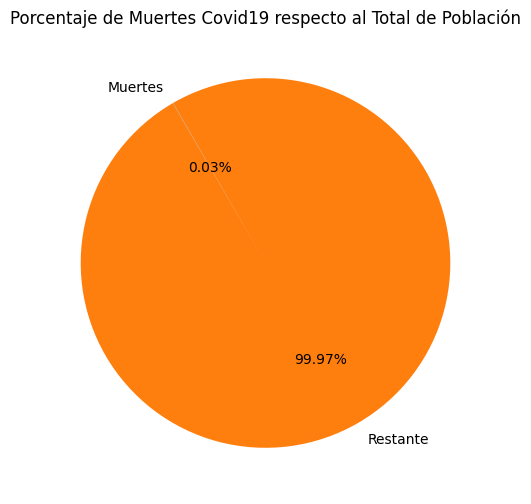

In [75]:
# Datos proporcionados
total_poblacion = 24363483115849.0
total_muertes = 8387297159.0

# Calcular el porcentaje de muertes respecto al total
porcentaje_muertes = (total_muertes / total_poblacion) * 100
porcentaje_restante = 100 - porcentaje_muertes

# Crear datos para el gráfico
labels = ['Muertes', 'Restante']
sizes = [porcentaje_muertes, porcentaje_restante]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=120)
plt.title('Porcentaje de Muertes Covid19 respecto al Total de Población')
plt.show()

In [76]:
archivo_pruebas_pcr = pd.read_csv(r'C:\DATA_SCIENCE\EDA_Entrega\Base de Datos para EDA 1\casos_diag_ccaadecl.csv')

archivo_pruebas_pcr.sample(5)

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
800,AS,2020-02-20,0,0,0,0,0,0
5290,CT,2020-10-13,2981,2965,0,11,4,1
11260,MC,2021-08-23,293,202,0,90,0,1
334,IB,2020-01-26,0,0,0,0,0,0
7132,CN,2021-01-18,306,213,0,93,0,0


In [77]:
# Diccionario con los códigos ISO de comunidades autónomas
comunidades_autonomas = {
    'AN': 'Andalucía',
    'AR': 'Aragón',
    'AS': 'Asturias',
    'IB': 'Islas Baleares',
    'CN': 'Canarias',
    'CB': 'Cantabria',
    'CM': 'Castilla-La Mancha',
    'CL': 'Castilla y León',
    'CT': 'Cataluña',
    'EX': 'Extremadura',
    'GA': 'Galicia',
    'MD': 'Madrid',
    'MC': 'Murcia',
    'NC': 'Navarra',
    'RI': 'La Rioja',
    'PV': 'País Vasco',
    'VC': 'Comunidad Valenciana',
    'CE': 'Ceuta',
    'ML': 'Melilla'
}
# Mapear los nombres de las comunidades autónomas a la columna 'ccaa_iso'
archivo_pruebas_pcr['Comunidad Autónoma'] = archivo_pruebas_pcr['ccaa_iso'].map(comunidades_autonomas)
# Mostrar una muestra del DataFrame actualizado
archivo_pruebas_pcr.sample(5)

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,Comunidad Autónoma
14420,VC,2022-02-05,3475,493,0,1764,0,1218,Comunidad Valenciana
9787,AS,2021-06-07,37,25,0,12,0,0,Asturias
359,RI,2020-01-27,0,0,0,0,0,0,La Rioja
6895,RI,2021-01-05,177,163,0,14,0,0,La Rioja
1886,CL,2020-04-17,293,252,41,0,0,0,Castilla y León


In [78]:
# Eliminar la columna de iniciales
archivo_pruebas_pcr = archivo_pruebas_pcr.drop(columns=['ccaa_iso'], errors = 'ignore' )

# Mover la columna "Comunidad Autónoma" a la primera posición
columnas = ['Comunidad Autónoma'] + [col for col in archivo_pruebas_pcr.columns if col != 'Comunidad Autónoma']
archivo_pruebas_pcr = archivo_pruebas_pcr[columnas]

# Mostrar varias filas para verificar
archivo_pruebas_pcr.sample(5)

,Comunidad Autónoma,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
14193,Andalucía,2022-01-25,7998,3354,0,4644,0,0
12317,Castilla y León,2021-10-18,111,91,0,20,0,0
7092,Castilla y León,2021-01-16,1904,1117,0,787,0,0
2730,Madrid,2020-05-31,50,50,0,0,0,0
6614,Asturias,2020-12-22,100,95,0,5,0,0


In [79]:
# Agrupar por "Comunidad Autónoma" y sumar las columnas específicas
resultado = archivo_pruebas_pcr.groupby('Comunidad Autónoma')[['num_casos', 'num_casos_prueba_pcr',\
                                                               'num_casos_prueba_test_ac', 'num_casos_prueba_ag']].sum()

# Mostrar el resultado
print(resultado)

'''
Dato de interés, prueba AC es la prueba anticuerpos para saber si el paciente ha estado expuesto al virus en el pasado.
Prueba de AG, son las pruebas de antígenos, son menos precisas que las PCR y tienen mayor probabilidad de dar falsos negativos.
'''

                      num_casos  num_casos_prueba_pcr  \
Comunidad Autónoma                                      
Andalucía               1410543                802485   
Aragón                   410974                181863   
Asturias                 209053                172486   
Canarias                 338288                145247   
Cantabria                130992                 87747   
Castilla y León          687245                292604   
Castilla-La Mancha       489536                249979   
Cataluña                2371327                952681   
Ceuta                     19985                  2964   
Comunidad Valenciana    1369517                416575   
Extremadura              254126                 95996   
Galicia                  590772                324629   
Islas Baleares           269512                132799   
La Rioja                  94338                 42060   
Madrid                  1643116                846391   
Melilla                   20724

'\nDato de interés, prueba AC es la prueba anticuerpos para saber si el paciente ha estado expuesto al virus en el pasado.\nPrueba de AG, son las pruebas de antígenos, son menos precisas que las PCR y tienen mayor probabilidad de dar falsos negativos.\n'

                      num_casos  num_casos_prueba_pcr  \
Andalucía               1410543                802485   
Aragón                   410974                181863   
Asturias                 209053                172486   
Canarias                 338288                145247   
Cantabria                130992                 87747   
Castilla y León          687245                292604   
Castilla-La Mancha       489536                249979   
Cataluña                2371327                952681   
Ceuta                     19985                  2964   
Comunidad Valenciana    1369517                416575   
Extremadura              254126                 95996   
Galicia                  590772                324629   
Islas Baleares           269512                132799   
La Rioja                  94338                 42060   
Madrid                  1643116                846391   
Melilla                   20724                  7806   
Murcia                   395823

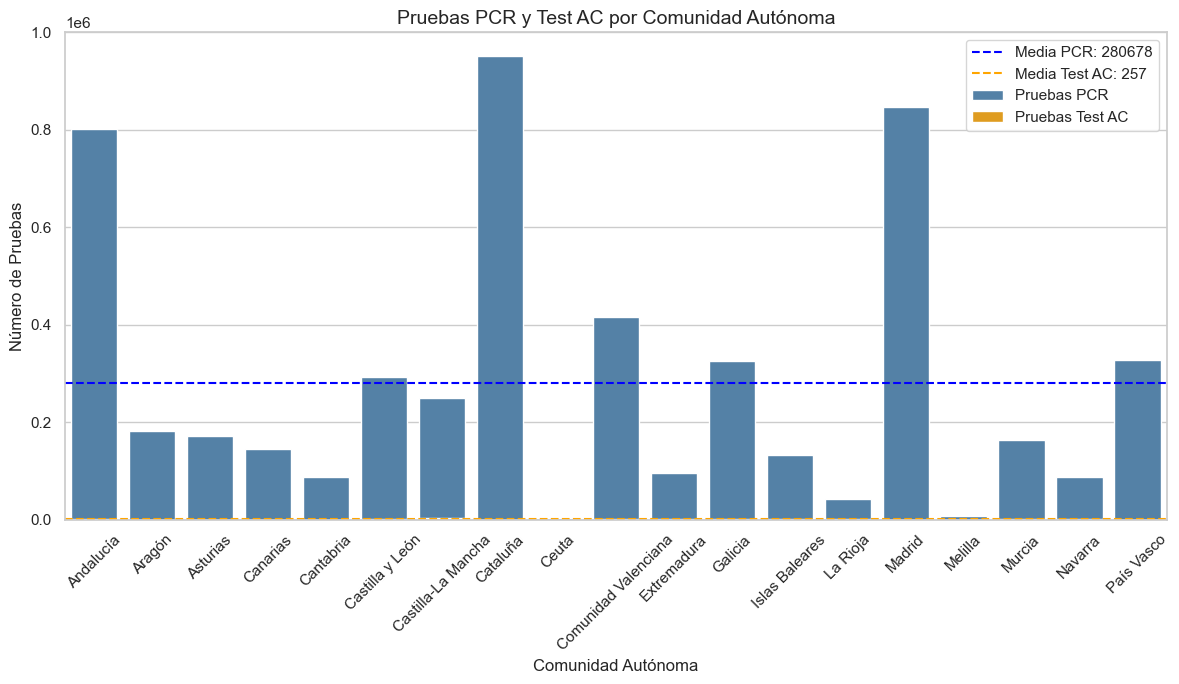

In [198]:
# Datos corregidos para asegurar que las longitudes coincidan
data = {
    "num_casos": [1410543, 410974, 209053, 338288, 130992, 687245, 489536, 2371327, 19985, 1369517, 
                  254126, 590772, 269512, 94338, 1643116, 20724, 395823, 232530, 674178],
    "num_casos_prueba_pcr": [802485, 181863, 172486, 145247, 87747, 292604, 249979, 952681, 2964, 416575, 
                             95996, 324629, 132799, 42060, 846391, 7806, 163279, 87337, 327957],
    "num_casos_prueba_test_ac": [323, 1, 0, 0, 1, 690, 2617, 0, 8, 357, 294, 64, 155, 60, 0, 0, 256, 64, 0]
}

# Lista de comunidades autónomas
comunidades = ["Andalucía", "Aragón", "Asturias", "Canarias", "Cantabria", "Castilla y León", 
               "Castilla-La Mancha", "Cataluña", "Ceuta", "Comunidad Valenciana", "Extremadura", 
               "Galicia", "Islas Baleares", "La Rioja", "Madrid", "Melilla", "Murcia", "Navarra", 
               "País Vasco"]

# Crear el DataFrame
df = pd.DataFrame(data, index=comunidades)

# Verificar el DataFrame
print(df)

# Calcular la media para PCR y Test AC
media_pcr = df["num_casos_prueba_pcr"].mean()
media_test_ac = df["num_casos_prueba_test_ac"].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras para PCR y Test AC
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=df.index, y=df["num_casos_prueba_pcr"], color="steelblue", label="Pruebas PCR", ax=ax)
sns.barplot(x=df.index, y=df["num_casos_prueba_test_ac"], color="orange", label="Pruebas Test AC", ax=ax)

# Añadir líneas de la media
ax.axhline(media_pcr, color="blue", linestyle="--", label=f"Media PCR: {int(media_pcr)}")
ax.axhline(media_test_ac, color="orange", linestyle="--", label=f"Media Test AC: {int(media_test_ac)}")

# Configurar etiquetas y leyenda
ax.set_title("Pruebas PCR y Test AC por Comunidad Autónoma", fontsize=14)
ax.set_xlabel("Comunidad Autónoma", fontsize=12)
ax.set_ylabel("Número de Pruebas", fontsize=12)
plt.xticks(rotation=45)
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [80]:
archivo_pruebas_pcr['num_casos'].sum()

np.int64(11612579)

In [81]:
archivo_grupo_edad = pd.read_csv(r'C:\DATA_SCIENCE\EDA_Entrega\Base de Datos para EDA 1\casos_hosp_uci_def_sexo_edad_provres.csv')

archivo_grupo_edad.sample(5)

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
489350,SE,NC,0-9,2020-11-03,0,0,0,0
754800,S,H,0-9,2021-04-19,2,0,0,0
750687,BI,NC,70-79,2021-04-17,0,0,0,0
833691,GI,NC,10-19,2021-06-08,0,0,0,0
1129216,CC,M,60-69,2021-12-11,4,0,0,0


In [82]:
# Diccionario con los códigos ISO y nombres de provincias
provincias = {
    'A': 'Alicante', 'AB': 'Albacete', 'AL': 'Almería', 'AV': 'Ávila', 'B': 'Barcelona',
    'BA': 'Badajoz', 'BI': 'Bizkaia (Vizcaya)', 'BU': 'Burgos', 'C': 'A Coruña', 'CA': 'Cádiz',
    'CC': 'Cáceres', 'CO': 'Córdoba', 'CR': 'Ciudad Real', 'CS': 'Castellón', 'CU': 'Cuenca',
    'GI': 'Girona', 'GR': 'Granada', 'GU': 'Guadalajara', 'H': 'Huelva', 'HU': 'Huesca',
    'J': 'Jaén', 'L': 'Lleida', 'LE': 'León', 'LO': 'La Rioja', 'LU': 'Lugo', 'M': 'Madrid',
    'MA': 'Málaga', 'MU': 'Murcia', 'NA': 'Navarra', 'O': 'Asturias', 'OR': 'Ourense',
    'P': 'Palencia', 'PM': 'Islas Baleares (Palma de Mallorca)', 'PO': 'Pontevedra',
    'SA': 'Salamanca', 'SE': 'Sevilla', 'SG': 'Segovia', 'SO': 'Soria', 'SS': 'Gipuzkoa (Guipúzcoa)',
    'T': 'Tarragona', 'TE': 'Teruel', 'TO': 'Toledo', 'V': 'Valencia', 'VA': 'Valladolid',
    'VI': 'Álava', 'Z': 'Zaragoza', 'ZA': 'Zamora', 'CE': 'Ceuta', 'ML': 'Melilla'
}

# Mapear los nombres de las provincias al DataFrame existente
archivo_grupo_edad['provincia_nombre'] = archivo_grupo_edad['provincia_iso'].map(provincias)

# Eliminar la columna 'provincia_iso'
archivo_grupo_edad = archivo_grupo_edad.drop(columns=['provincia_iso'])

# Reorganizar las columnas colocando 'provincia_nombre' al principio
columnas = ['provincia_nombre'] + [col for col in archivo_grupo_edad.columns if col != 'provincia_nombre']
archivo_grupo_edad = archivo_grupo_edad[columnas]

# Mostrar una muestra para verificar el cambio
archivo_grupo_edad.sample(5)




,provincia_nombre,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
177117,Huelva,NC,70-79,2020-04-21,0,0,0,0
149346,Valladolid,H,60-69,2020-04-03,7,9,0,0
504583,Granada,M,30-39,2020-11-13,47,2,0,0
1090535,NaN,H,50-59,2021-11-16,11,1,0,0
10527,NaN,NC,70-79,2020-01-07,0,0,0,0


In [83]:
# Eliminar filas donde 'provincia_nombre' sea NaN
archivo_grupo_edad = archivo_grupo_edad.dropna(subset=['provincia_nombre'])

# Verificar que ya no haya NaN
print(archivo_grupo_edad['provincia_nombre'].isna().sum())  # Debería devolver 0
archivo_grupo_edad.sample(5) # Mostrar una muestra del DataFrame actualizado


0


,provincia_nombre,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
187403,Teruel,NC,30-39,2020-04-27,0,0,0,0
671515,Girona,NC,50-59,2021-02-26,0,0,0,0
496008,Álava,M,80+,2020-11-07,1,3,0,0
900595,Huesca,NC,50-59,2021-07-20,0,0,0,0
1207525,Lleida,NC,50-59,2022-01-29,0,0,0,0


In [84]:
''' 
Para el saneamiento de los datos el tipo de sexo NC, no voy a contabilizarlo en el estudio. NC significa no consta, por tanto,
no me parece que sea un dato a tener en cuenta sino podemos clasificarlo por genero. Les daremos un tratamiento como los nulos.
'''

archivo_grupo_edad['sexo'].value_counts()

sexo
H     392160
M     392160
NC    392160
Name: count, dtype: int64

In [85]:
# Filtrar las filas donde 'sexo' sea 'NC'
sexo_nc = archivo_grupo_edad[archivo_grupo_edad['sexo'] == 'NC']

sexo_nc.sample(5)


,provincia_nombre,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
653637,Barcelona,NC,70-79,2021-02-15,0,0,0,0
660232,Córdoba,NC,20-29,2021-02-19,0,0,0,0
933235,Valladolid,NC,50-59,2021-08-09,0,0,0,0
713844,Álava,NC,40-49,2021-03-24,0,0,0,0
740606,Segovia,NC,60-69,2021-04-10,0,0,0,0


In [90]:
# Eliminar filas donde 'sexo' sea 'NC'
archivo_grupo_edad = archivo_grupo_edad[archivo_grupo_edad['sexo'] != 'NC']

# Verificar que ya no haya valores 'NC' en la columna 'sexo'
print(archivo_grupo_edad['sexo'].unique())  # Debería mostrar solo valores diferentes de 'NC'
archivo_grupo_edad  # Mostrar una muestra del DataFrame actualizado

['H' 'M']


,provincia_nombre,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,Alicante,H,0-9,2020-01-01,0,0,0,0
1,Alicante,H,10-19,2020-01-01,0,0,0,0
2,Alicante,H,20-29,2020-01-01,0,0,0,0
3,Alicante,H,30-39,2020-01-01,0,0,0,0
4,Alicante,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
1299015,Zamora,M,50-59,2022-03-27,3,0,0,0
1299016,Zamora,M,60-69,2022-03-27,2,0,0,0
1299017,Zamora,M,70-79,2022-03-27,1,0,0,0
1299018,Zamora,M,80+,2022-03-27,9,1,0,0


In [136]:
# Convertir la columna 'fecha' a tipo datetime (por si no lo está)
archivo_grupo_edad["fecha"] = pd.to_datetime(archivo_grupo_edad["fecha"], errors="coerce")

# Obtener la fecha más reciente ordenando la columna fecha
fecha_mas_reciente = archivo_grupo_edad["fecha"].max()

fecha_mas_reciente

Timestamp('2022-03-27 00:00:00')

In [133]:
# Agrupar por grupo de edad y sumar el total de muertes
total_muertes_por_edad = archivo_grupo_edad.groupby("grupo_edad")["num_def"].sum().reset_index()

# Mostrar los resultados
print(total_muertes_por_edad)

  grupo_edad  num_def
0        0-9       21
1      10-19       27
2      20-29      132
3      30-39      326
4      40-49     1116
5      50-59     3811
6      60-69    10101
7      70-79    21366
8        80+    62794
9         NC       23


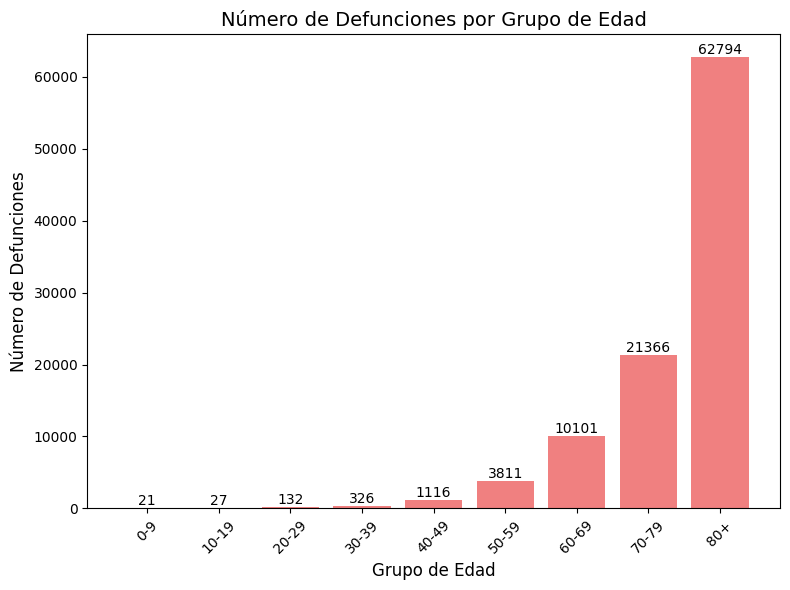

In [139]:
# Agrupar por grupo de edad y sumar el total de defunciones
total_muertes_por_edad = archivo_grupo_edad.groupby("grupo_edad")["num_def"].sum().reset_index()

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(total_muertes_por_edad["grupo_edad"], total_muertes_por_edad["num_def"], color="lightcoral")

# Añadir etiquetas y título
ax.set_xlabel("Grupo de Edad", fontsize=12)
ax.set_ylabel("Número de Defunciones", fontsize=12)
ax.set_title("Número de Defunciones por Grupo de Edad", fontsize=14)
ax.tick_params(axis="x", rotation=45)  # Rotar etiquetas del eje x si es necesario

# Mostrar valores encima de las barras
for i, v in enumerate(total_muertes_por_edad["num_def"]):
    ax.text(i, v + 10, str(v), ha="center", va="bottom", fontsize=10)

plt.tight_layout()
# Guardar el gráfico como una imagen
plt.savefig("grafico.png", dpi=300, bbox_inches='tight')
plt.show()

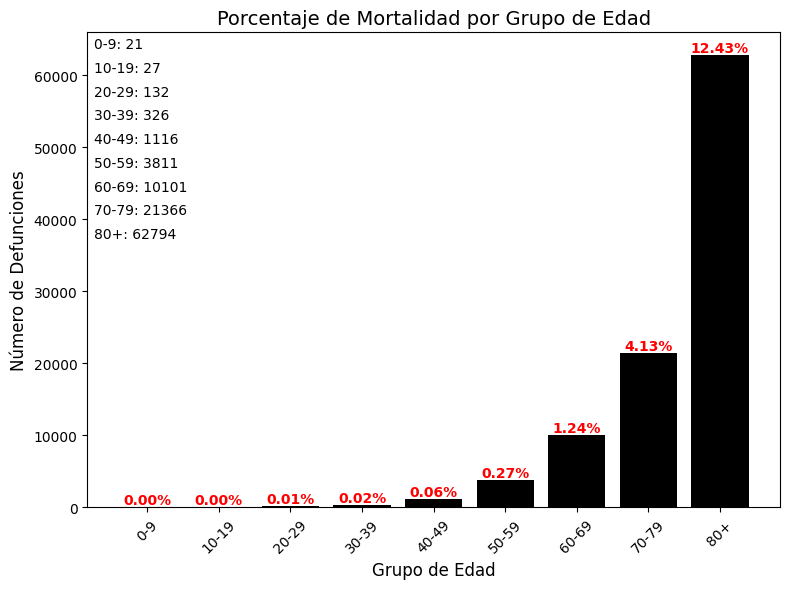

In [187]:
# Agrupar por grupo de edad y calcular la suma de casos y defunciones
muertes_por_edad = archivo_grupo_edad.groupby("grupo_edad")[["num_def", "num_casos"]].sum().reset_index()

# Calcular el porcentaje de mortalidad
muertes_por_edad["porcentaje_mortalidad"] = (muertes_por_edad["num_def"] / muertes_por_edad["num_casos"]) * 100

# Crear un gráfico de barras para el número de defunciones
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de barras: número total de defunciones
bars = ax.bar(muertes_por_edad["grupo_edad"], muertes_por_edad["num_def"], color="black")

# Añadir solo el porcentaje de mortalidad encima de cada barra (en rojo)
for i, porcentaje in enumerate(muertes_por_edad["porcentaje_mortalidad"]):
    ax.text(i, bars[i].get_height() + 10, f"{porcentaje:.2f}%", 
            ha="center", va="bottom", color="red", fontsize=10, fontweight="bold")

# Crear una leyenda dentro del gráfico con el número total de defunciones
for i, (grupo, num_def) in enumerate(zip(muertes_por_edad["grupo_edad"], muertes_por_edad["num_def"])):
    ax.text(0.01, 0.99 - i * 0.05, f"{grupo}: {int(num_def)}", 
            transform=ax.transAxes, fontsize=10, color="black", ha="left", va="top")

# Configuración de etiquetas y título
ax.set_xlabel("Grupo de Edad", fontsize=12)
ax.set_ylabel("Número de Defunciones", fontsize=12)
ax.set_title("Porcentaje de Mortalidad por Grupo de Edad", fontsize=14)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()







In [134]:
archivo_grupo_edad['num_def'].sum()

np.int64(99717)

In [116]:
# Calcular el total de casos para hombres (H) y mujeres (M)
total_casos_hombres = archivo_grupo_edad[archivo_grupo_edad["sexo"] == "H"]["num_casos"].sum()
total_casos_mujeres = archivo_grupo_edad[archivo_grupo_edad["sexo"] == "M"]["num_casos"].sum()

# Mostrar los resultados
total_casos_hombres, total_casos_mujeres


(np.int64(5100295), np.int64(5738617))

In [117]:
# Calcular el total de muertes para hombres (H) y mujeres (M)
total_muertes_hombres = archivo_grupo_edad[archivo_grupo_edad["sexo"] == "H"]["num_def"].sum()
total_muertes_mujeres = archivo_grupo_edad[archivo_grupo_edad["sexo"] == "M"]["num_def"].sum()

# Mostrar los resultados
total_muertes_hombres, total_muertes_mujeres


(np.int64(55272), np.int64(44445))

In [118]:
# Datos proporcionados
total_casos_hombres = 5100295
total_casos_mujeres = 5738617
total_muertes_hombres = 55272
total_muertes_mujeres = 44445

# Calcular el porcentaje de mortalidad para hombres y mujeres
mortalidad_hombres = (total_muertes_hombres / total_casos_hombres) * 100
mortalidad_mujeres = (total_muertes_mujeres / total_casos_mujeres) * 100

# Mostrar los resultados
mortalidad_hombres, mortalidad_mujeres


(1.0837020211575998, 0.7744897420406345)

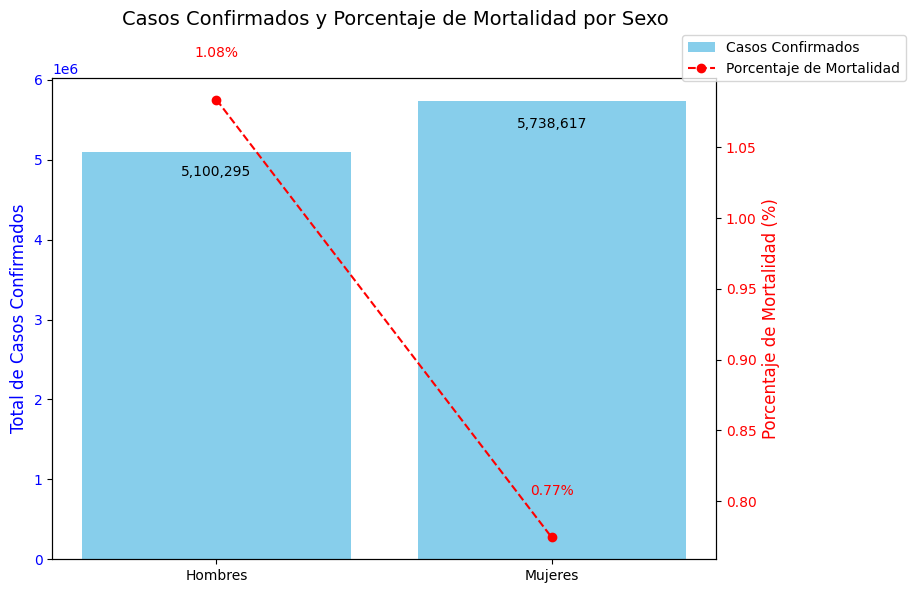

In [132]:
# Configurar el gráfico con etiquetas dentro de las barras y la línea
fig, ax1 = plt.subplots(figsize=(8, 6))

# Crear gráfico de barras para los casos confirmados
bars = ax1.bar(categorias, casos_confirmados, color="skyblue", label="Casos Confirmados")
ax1.set_ylabel("Total de Casos Confirmados", color="blue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="blue")

# Añadir etiquetas dentro de las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height - (height * 0.05), f"{height:,}", 
             ha="center", va="center", color="black", fontsize=10)

# Crear un eje secundario para el porcentaje de mortalidad
ax2 = ax1.twinx()
linea = ax2.plot(categorias, porcentaje_mortalidad, color="red", marker="o", linestyle="--", label="Porcentaje de Mortalidad")
ax2.set_ylabel("Porcentaje de Mortalidad (%)", color="red", fontsize=12)
ax2.tick_params(axis='y', labelcolor="red")

# Añadir etiquetas para el porcentaje de mortalidad
for i, txt in enumerate(porcentaje_mortalidad):
    ax2.text(i, txt + 0.03, f"{txt:.2f}%", color="red", fontsize=10, ha="center")

# Título y leyendas
fig.suptitle("Casos Confirmados y Porcentaje de Mortalidad por Sexo", fontsize=14)
fig.tight_layout()
fig.legend(loc="lower left", bbox_to_anchor=(0.85, 0.85))

# Guardar el gráfico como una imagen
plt.savefig("grafico.png", dpi=300, bbox_inches='tight')
plt.show()


In [89]:
# Agrupar por provincia y sumar las columnas num_casos y num_def
df_agrupado = archivo_grupo_edad.groupby("provincia_nombre")[["num_casos", "num_def"]].sum().reset_index()

df_agrupado



,provincia_nombre,num_casos,num_def
0,A Coruña,240813,1378
1,Albacete,88516,982
2,Alicante,467588,3464
3,Almería,136435,1149
4,Asturias,206423,2603
5,Badajoz,164377,1188
6,Barcelona,1756207,14601
7,Bizkaia (Vizcaya),335126,3084
8,Burgos,106301,1090
9,Castellón,160336,1053


In [ ]:
# Con esta línea de código quitamos el limitador de columnas y se muestran todas.
pd.set_option('display.max_columns', None)

archivo_etnico = pd.read_excel(r'C:\DATA_SCIENCE\EDA_Entrega\Base de Datos para EDA 1\Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx')

archivo_etnico.sample(10)

c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,MI,PVD,CHF,CVD,DEMENT,COPD,DM Complicated,DM Simple,Renal Disease,All CNS,Pure CNS,Stroke,Seizure,OldSyncope,OldOtherNeuro,OtherBrnLsn,Age.1,AgeScore,O2SatsYes,OsSats,O2 Sat < 94,TempYes,Temp,Temp > 38,MapYes,MAP,MAP < 70,DDimerYes,Ddimer,D-Dimer > 3,PltsYes,Plts,PltsScore,INRYes,INR,INR > 1.2,BUNYes,BUN,BUN > 30,CrtnYes,Creatinine,CrtnScore,SodimuYes,Sodium,Sodium < 139 or > 154,GlucoseYese,Glucose,Glucose <60 or > 500,ASTYes,AST,AST > 40,ALTYes,ALT,ALT > 40,WBCYes,WBC,WBC <1.8 or > 4.8,LymphoYes,Lympho,Lymphocytes < 1,IL6Yes,IL6,IL6 > 150,FerritinYes,Ferritin,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
1604,1,1,5,0,>60,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,1,1,98,0,1,37.666667,0,1,85.333333,0,0,0.00,0,1,91,2,1,1.4,0,1,6.0,0,1,0.39,0,1,145.0,0,1,63.0,0,1,19.999,0,1,9.999,0,1,2.2,0,1,0.6,1,0,0.00,0,0,0.0,0,0,0.0,0,0,0.0000,0,1,0.01,0
2584,0,1,3,0,>80,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,3,1,95,0,1,36.388889,0,1,80.666667,0,1,1.00,0,1,197,0,1,1.3,0,1,32.0,1,1,1.53,1,1,143.0,0,1,265.0,0,1,29.000,0,1,13.000,0,1,17.3,1,1,11.1,0,0,0.00,0,1,93.0,0,1,2.0,0,1,0.1000,0,1,0.03,0
1221,1,1,8,0,>60,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,1,94,0,1,39.444444,1,1,78.333333,0,1,1.72,0,1,309,0,1,1.3,0,1,55.0,1,1,2.80,2,1,135.0,0,1,282.0,0,1,19.999,0,1,9.999,0,1,7.1,1,1,0.6,1,1,9.50,0,1,575.0,1,1,16.2,1,1,2.1000,1,1,0.36,1
597,1,1,3,0,>80,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,3,1,96,0,1,36.888889,0,1,72.666667,0,1,3.99,1,1,152,0,1,1.3,1,1,8.0,0,1,0.80,0,1,134.0,0,0,0.0,0,1,43.000,1,1,13.000,0,1,5.8,1,1,0.7,1,1,26.20,0,1,143.0,0,1,1.8,0,1,0.2000,1,1,0.01,0
4525,0,1,7,0,>60,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,1,1,89,1,1,38.555556,1,1,92.666667,0,1,0.54,0,1,170,0,1,1.0,0,1,0.0,0,1,0.71,0,1,137.0,0,0,0.0,0,1,44.000,1,1,46.000,1,1,6.3,1,1,1.5,0,1,40.00,0,1,1404.0,1,1,13.2,1,1,0.3000,1,1,0.01,0
3969,0,1,46,0,>60,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,1,1,100,0,1,36.833333,0,1,87.666667,0,1,0.00,0,1,180,0,1,0.0,0,1,0.0,0,1,0.00,0,1,0.0,1,0,0.0,0,1,0.000,0,1,0.000,0,1,10.0,1,1,2.8,0,0,0.00,0,1,0.0,0,1,0.0,0,1,0.0000,0,0,0.00,0
2874,0,1,5,0,0-60,2,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,1,46,0,1,93,1,1,37.666667,0,1,94.666667,0,1,2.10,0,1,385,0,1,1.1,0,1,34.0,1,1,1.00,0,1,145.0,0,1,107.0,0,1,143.000,1,1,111.000,1,1,5.5,1,1,0.5,1,1,26.90,0,1,1459.0,1,1,3.6,0,1,0.3000,1,1,0.01,0
2161,1,1,4,0,>70,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,2,1,100,0,1,35.722222,0,1,77.666667,0,1,8.64,1,1,391,0,1,1.1,1,1,88.0,1,1,9.39,2,1,140.0,0,1,108.0,0,1,55.000,1,1,52.000,1,1,6.0,1,1,0.9,1,1,21.02,0,1,2303.0,1,1,1.7,0,1,0.8000,1,1,0.14,1
2018,1,1,22,1,0-60,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,59,0,1,98,0,1,37.000000,0,1,95.333333,0,1,1.50,0,1,216,0,1,1.1,0,0,0.0,0,1,0.67,0,1,135.0,0,0,0.0,0,1,79.000,1,1,64.000,1,1,10.3,1,1,0.4,1,1,174.94,1,1,987.0,1,1,2.7,0,1,9.8000,1,1,0.01,0
1208,1,1,3,0,>60,2,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,62,1,0,0,1,0,0.000000,0,0,0.000000,0,1,1.04,0,0,0,0,0,0.0,0,0,0.0,0,0,0.00,0,0,0.0,0,0,0.0,0,0,0.000,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0.00,0,1,726.0,1,1,0.6,0,1,0.0999,0,0,0.00,0


In [60]:
# Filtrando el DataFrame con las columnas seleccionadas
columnas_a_conservar = ['Death', 'Age', 'Black', 'White', 'Asian', 'Latino']
df_filtrado = archivo_etnico[columnas_a_conservar]

# Muestra las primeras filas del DataFrame
df_filtrado.head(5)

,Death,Age,Black,White,Asian,Latino
0,0,>80,0,0,0,0
1,1,>60,0,1,0,0
2,1,>80,0,1,0,0
3,0,>70,1,0,0,0
4,0,>70,1,0,0,0


In [58]:
# Agrupar por franja de edad y calcular la suma de muertes por raza
grouped = df_filtrado.groupby("Age").agg(
    Deaths=("Death", "sum"),
    Black=("Black", "sum"),
    White=("White", "sum"),
    Asian=("Asian", "sum"),
    Latino=("Latino", "sum")
).reset_index()

grouped.head(20)

,Age,Deaths,Black,White,Asian,Latino
0,0-60,204,664,113,57,763
1,>60,275,423,120,23,371
2,>70,355,398,127,24,356
3,>80,314,258,106,17,263


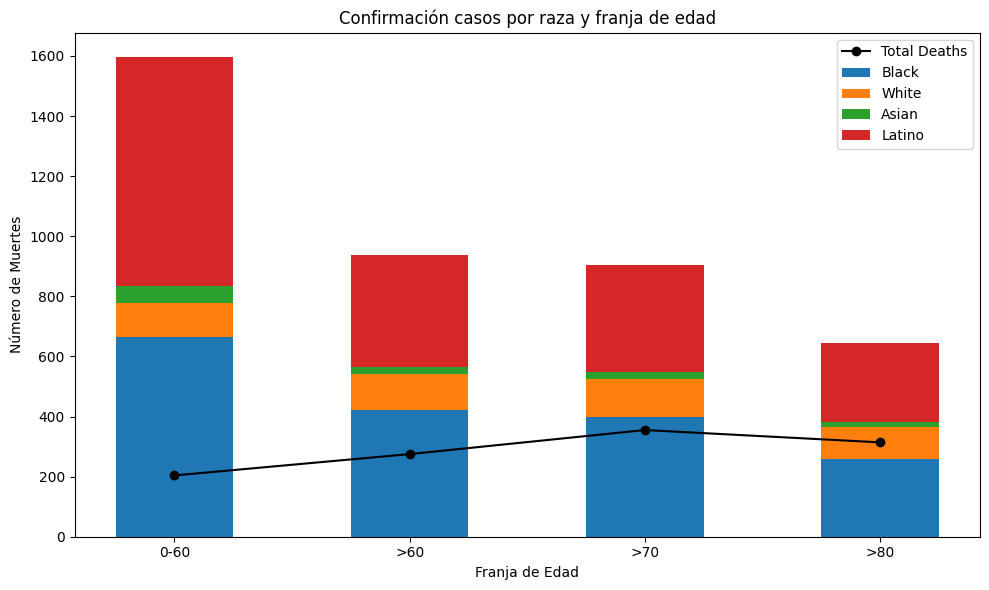

In [ ]:
# Crear el DataFrame
data = {
    "Age": ["0-60", ">60", ">70", ">80"],
    "Deaths": [204, 275, 355, 314],
    "Black": [664, 423, 398, 258],
    "White": [113, 120, 127, 106],
    "Asian": [57, 23, 24, 17],
    "Latino": [763, 371, 356, 263]
}

df = pd.DataFrame(data)

# Configuración de categorías y valores
age_groups = df["Age"]
death_totals = df["Deaths"]
races = ["Black", "White", "Asian", "Latino"]
race_values = df[races].values.T

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
x_positions = np.arange(len(age_groups))

# Apilar cada grupo racial
bottom = np.zeros(len(age_groups))
for i, race in enumerate(races):
    ax.bar(x_positions, race_values[i], bar_width, label=race, bottom=bottom)
    bottom += race_values[i]

# Agregar línea para el total de muertes
ax.plot(x_positions, death_totals, color="black", marker="o", label="Total Deaths")

# Configurar el gráfico
ax.set_xlabel("Franja de Edad")
ax.set_ylabel("Número de Muertes")
ax.set_title("Confirmación casos por raza y franja de edad")
ax.set_xticks(x_positions)
ax.set_xticklabels(age_groups)
ax.legend(loc="upper right")

# Mostrar gráfico
plt.tight_layout()
plt.show()
